# Exploratory Data Analysis v1.0

This notebook will contain a series of exploratory data analysis (EDA), one of the most important steps in any data science project. The goal of this notebook is to provide a quick overview of the data and the methods used to explore it. The final objective is to select wich variables will be used as features in the machine learning models and wich variable will be used as a target variable.

## 1. Imports

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import sys
import matplotlib.pyplot as plt

sys.path.append('../src/features')
from make_features import MakeFeatures

pd.set_option('display.max_columns', None)

## 2. Reading Raw Data

In [2]:
raw_data = pd.read_parquet('../data/raw/v1-enem-raw-20220531.parquet') 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509304 entries, 0 to 509303
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           509304 non-null  object 
 1   enem_year                    509304 non-null  int64  
 2   age                          509304 non-null  int64  
 3   sex                          509304 non-null  object 
 4   marital_status               509304 non-null  int64  
 5   color_race                   509304 non-null  int64  
 6   id_city_school               114976 non-null  float64
 7   id_city_test                 509304 non-null  int64  
 8   high_school_status           509304 non-null  int64  
 9   year_completion_high_school  509304 non-null  int64  
 10  school_type                  509304 non-null  int64  
 11  presence_day_1               509304 non-null  int64  
 12  presence_day_2               509304 non-null  int64  
 13 

## 3. Exploratory Data Analysis

### 3.1 Check NULL Values

<AxesSubplot:>

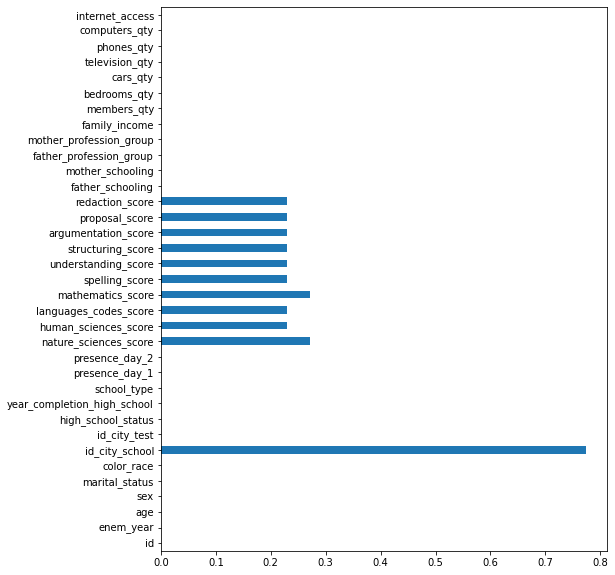

In [8]:
(raw_data.isna().sum() / raw_data.shape[0]).plot.barh(figsize = (8, 10))

The dataset has a lot of missing values. Especially in score data and id_city_school. In the firts case, it occurs because the score data is not filled if the student didn't take the test. In the second case, some people don't remembered where they study or don't remember to fill it.

*  The id_city_school will be removed from the dataset because it is not useful for the modelling;
*  The candidates that have null values in score data will be removed from the dataset.


In [69]:
# filter out candidates that failed in ENEM in one of the two days
# each presence day has value 1 then (presence_day_1 + presence_day_2) is equal 2
data = raw_data.drop('id_city_school', axis = 1).query(
    '(presence_day_1 + presence_day_2) == 2'
).dropna()

data.head(5)

,id,enem_year,age,sex,marital_status,color_race,id_city_test,high_school_status,year_completion_high_school,school_type,presence_day_1,presence_day_2,nature_sciences_score,human_sciences_score,languages_codes_score,mathematics_score,spelling_score,understanding_score,structuring_score,argumentation_score,proposal_score,redaction_score,father_schooling,mother_schooling,father_profession_group,mother_profession_group,family_income,members_qty,bedrooms_qty,cars_qty,television_qty,phones_qty,computers_qty,internet_access
0,190001004642,2019,2,F,1,3,1502400,2,0,2,1,1,376.4,354.7,525.8,389.4,160.0,140.0,120.0,120.0,120.0,660.0,B,D,B,B,C,3,C,A,B,D,A,A
1,190001004644,2019,3,F,1,4,1508159,1,1,1,1,1,373.3,405.2,441.4,496.5,140.0,120.0,140.0,160.0,140.0,700.0,C,B,A,A,B,4,C,A,B,C,A,A
2,190001004650,2019,8,F,1,5,1500800,1,6,1,1,1,503.2,546.7,551.8,436.8,120.0,120.0,140.0,140.0,160.0,680.0,D,C,C,C,E,5,D,A,C,E,A,B
3,190001004659,2019,5,F,1,2,1500602,1,3,1,1,1,414.8,388.2,457.6,401.6,100.0,120.0,100.0,120.0,0.0,440.0,A,E,A,B,C,2,C,A,B,C,B,A
4,190001004660,2019,3,F,1,3,1507607,1,1,1,1,1,496.8,475.1,544.9,537.8,160.0,200.0,160.0,160.0,200.0,880.0,B,E,A,A,C,4,C,A,B,C,B,A


### 3.2 School Type Distribution

In [71]:
data.school_type.value_counts()

1    248088
2    101281
3     20645
Name: school_type, dtype: int64